This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** June 2025
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the main testing script for FIXED-boundary plasma equilibrium problems solved using the developed module EQUILIPY. EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

After selecting the MESH and defining the numerical solver parameters and the different parametric problem items (external magnets, initial plasma domain, initial guess and plasma current model), the file may be executed to launch the solver. EQUILIPY's output can be turned ON and OFF by change the bolean output parameters.

In [1]:
import sys
sys.path.append('../src/')

from GradShafranovSolver import *

## CREATE GRAD-SHAFRANOV PROBLEM
Equilibrium = GradShafranovSolver()

## DECLARE SWITCHS:
##### GHOST PENALTY STABILISATION
Equilibrium.FIXED_BOUNDARY = False
Equilibrium.GhostStabilization = True

##### OUTPUT PLOTS IN RUNTIME
Equilibrium.plotelemsClas = False      # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Equilibrium.plotPSI = True             # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Equilibrium.out_proparams = True       # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Equilibrium.out_elemsClas = True       # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Equilibrium.out_plasmaLS = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Equilibrium.out_plasmaBC = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY CONDITION VALUES 
Equilibrium.out_plasmaapprox = True    # OUTPUT SWITCH FOR PLASMA BOUNDARY APPROXIMATION DATA 
Equilibrium.out_ghostfaces = True      # OUTPUT SWITCH FOR GHOST STABILISATION FACES DATA 
Equilibrium.out_elemsys = False        # OUTPUT SWITCH FOR ELEMENTAL MATRICES
##### OUTPUT PICKLING
Equilibrium.out_pickle = True          # OUTPUT SWITCH FOR SIMULATION DATA PYTHON PICKLE

# DEFINE NUMERICAL_TREATMENT PARAMETERS  
Equilibrium.QuadratureOrder2D = 8      # ORDER OF NUMERICAL INTEGRATION QUADRATURES                    
Equilibrium.ext_maxiter = 5            # EXTERNAL LOOP (PHI_B) MAXIMUM ITERATIONS
Equilibrium.ext_tol = 1.0e-3           # EXTERNAL LOOP (PHI_B) CONVERGENCE TOLERANCE
Equilibrium.int_maxiter = 10           # INTERNAL LOOP (PHI_NORM) MAXIMUM ITERATIONS
Equilibrium.int_tol = 1.0e-4           # INTERNAL LOOP (PHI_NORM) CONVERGENCE TOLERANCE
Equilibrium.it_plasma = 0              # ITERATION AFTER WHICH THE PLASMA REGION CAN BE UPDATED
Equilibrium.beta = 1.0e6               # NITSCHE'S METHOD PENALTY PARAMETER
Equilibrium.Nconstrainedges = -1       # NUMBER OF PLAMA BOUNDARY APPROXIMATION EDGES ON WHICH CONSTRAIN BC
Equilibrium.zeta = 1.0e-2              # GHOST PENALTY PARAMETER
Equilibrium.PSIrelax = False           # PSI SOLUTION AITKEN RELAXATION SWITCH
Equilibrium.lambda0 = 0.3              # INITIAL AIKITEN'S RELAXATION PARAMETER
Equilibrium.PHIrelax = False           # PHI LEVEL-SET AITKEN RELAXATION SWITCH
Equilibrium.alphaPHI = 0.5             # PHI LEVEL-SET AITKEN RELAXATION INITIAL PARAMETER 
Equilibrium.R0_axis = 6.0              # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_axis = 1.0              # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.R0_saddle = 5.0            # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_saddle = -3.5           # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.opti_maxiter = 50          # CRITICAL POINTS OPTIMIZATION ALGORITHM MAXIMAL ITERATIONS NUMBER
Equilibrium.opti_tol = 1.0e-6          # CRITICAL POINTS OPTIMIZATION ALGORITHM SOLUTION TOLERANCE

Working directory: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY


Authorization required, but no authorization protocol specified

Authorization required, but no authorization protocol specified



In [2]:
print("     -> INITIALISE SIMULATION PARAMETERS...", end="")
Equilibrium.InitialiseParameters()
Equilibrium.InitialisePickleLists()
print('Done!')

     -> INITIALISE SIMULATION PARAMETERS...Done!


In [3]:
### SELECT MESH FOLDER...
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TRI03-COARSE-REC'
#MESH = 'TRI03-MEDIUM-REC'
#MESH = 'TRI03-INTERMEDIATE-REC'
#MESH = 'TRI03-FINE-REC'
#MESH = 'TRI03-SUPERFINE-REC'
#MESH = 'TRI03-MEGAFINE-REC'

#MESH = 'TRI06-COARSE-REC'
#MESH = 'TRI06-MEDIUM-REC'
#MESH = 'TRI06-INTERMEDIATE-REC'
#MESH = 'TRI06-FINE-REC'
#MESH = 'TRI06-SUPERFINE-REC'
MESH = 'TRI06-SUPERFINE-REC'


Equilibrium.InitialiseMESH(MESH)

INITIALISE MESH...
     -> READ MESH FILES...Done!


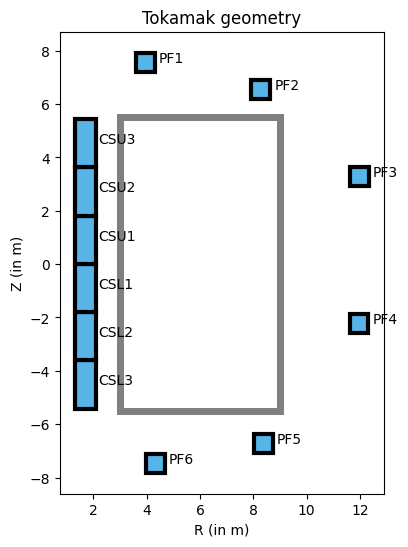

In [4]:
##### DEFINE TOKAMAK EXTERNAL MAGNETS WITH QUADRILATERAL COILS
# COILS
coil1 = QuadrilateralCoil(name = 'PF1',
                          Itotal = 5.73e6,
                          Xcenter = np.array([3.9431,7.5741]),
                          Area = 0.5)
coil2 = QuadrilateralCoil(name = 'PF2',
                          Itotal= -2.88e6,
                          Xcenter = np.array([8.2851,6.5398]),
                          Area = 0.5)
coil3 = QuadrilateralCoil(name = 'PF3',
                          Itotal= -5.81e6,
                          Xcenter = np.array([11.9919,3.2752]),
                          Area = 0.5)
coil4 = QuadrilateralCoil(name = 'PF4',
                          Itotal= -4.78e6,
                          Xcenter = np.array([11.9630,-2.2336]),
                          Area = 0.5)
coil5 = QuadrilateralCoil(name = 'PF5',
                          Itotal= -7.81e6,
                          Xcenter = np.array([ 8.3908,-6.7269]),
                          Area = 0.5)
coil6 = QuadrilateralCoil(name = 'PF6',
                          Itotal= 16.94e6,
                          Xcenter = np.array([4.3340, -7.4665]),
                          Area = 0.5)
   
# QUADRILATERAL CROSS-SECTION SOLENOIDS
solewidth = 0.8
solenoid1 = QuadrilateralCoil(name = 'CSL3',
                              Itotal = 5.3e6,
                              Xvertices = np.array([[1.696-solewidth/2, -5.415],
                                                    [1.696+solewidth/2, -5.415],
                                                    [1.696+solewidth/2, -3.6067],
                                                    [1.696-solewidth/2, -3.6067]]))
solenoid2 = QuadrilateralCoil(name = 'CSL2',
                              Itotal = -10.3e6,
                              Xvertices = np.array([[1.696-solewidth/2, -3.606],
                                                    [1.696+solewidth/2, -3.606],
                                                    [1.696+solewidth/2, -1.7983],
                                                    [1.696-solewidth/2, -1.7983]]))
solenoid3 = QuadrilateralCoil(name = 'CSL1',
                              Itotal = -20.8e6,
                              Xvertices = np.array([[1.696-solewidth/2, -1.798],
                                                    [1.696+solewidth/2, -1.798],
                                                    [1.696+solewidth/2, 0.0],
                                                    [1.696-solewidth/2, 0.0]]))
solenoid4 = QuadrilateralCoil(name = 'CSU1',
                              Itotal = -20.8e6,
                              Xvertices = np.array([[1.696-solewidth/2, 0.0],
                                                    [1.696+solewidth/2, 0.0],
                                                    [1.696+solewidth/2, 1.8183],
                                                    [1.696-solewidth/2, 1.8183]]))
solenoid5 = QuadrilateralCoil(name = 'CSU2',
                              Itotal = -4.05e6,
                              Xvertices = np.array([[1.696-solewidth/2, 1.8183],
                                                    [1.696+solewidth/2, 1.8183],
                                                    [1.696+solewidth/2, 3.6267],
                                                    [1.696-solewidth/2, 3.6267]]))
solenoid6 = QuadrilateralCoil(name = 'CSU3',
                              Itotal = -4.82e6,
                              Xvertices = np.array([[1.696-solewidth/2, 3.6267],
                                                    [1.696+solewidth/2, 3.6267],
                                                    [1.696+solewidth/2, 5.435],
                                                    [1.696-solewidth/2, 5.435]]))


magnets = [coil1, coil2, coil3, coil4, coil5, coil6,
           solenoid1, solenoid2, solenoid3, solenoid4, solenoid5, solenoid6]

Equilibrium.TOKAMAK = Tokamak(Equilibrium,magnets)

Equilibrium.TOKAMAK.Plot()

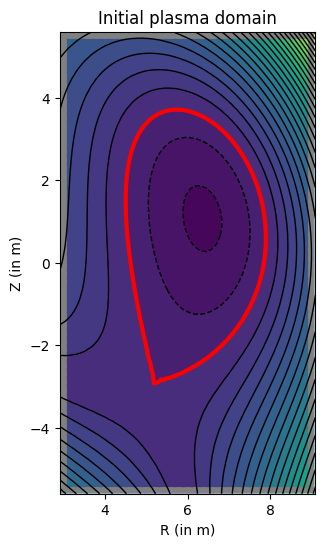

In [ ]:
# DEFINE INITIAL PLASMA BOUNDARY
"""
# PLASMA BOUNDARY PARAMETRISED USING LINEAR SOLUTION 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,   
                                           GEOMETRY = 'LINEAR', # PREDEFINED MODEL
                                           R0 = 6.0,            # MEAN RADIUS          
                                           epsilon = 0.38,      # INVERSE ASPECT RATIO
                                           kappa = 1.8,         # ELONGATION
                                           delta = 0.34)        # TRIANGULARITY
"""

"""
# PLASMA BOUNDARY PARAMETRISED USING ZHENG SOLUTION 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,
                                           GEOMETRY = 'ZHENG', # PREDEFINED MODEL
                                           R0 = 6.0,           # MEAN RADIUS          
                                           epsilon = 0.32,     # INVERSE ASPECT RATIO
                                           kappa = 1.7,        # ELONGATION
                                           delta = 0.33)       # TRIANGULARITY
"""

import numpy as np

X_SADDLE = np.array([5.2, -2.9])        # ACTIVE SADDLE POINT
X_RIGHT = np.array([7.9, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.5, 1.5])           # POINT ON LEFT
X_TOP = np.array([5.9, 3.7])            # POINT ON TOP

# PLASMA BOUNDARY PARAMETRISED F4E HAMILTONIAN 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,
                                           GEOMETRY = 'F4E',
                                           Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                           Xright = X_RIGHT,    # POINT ON RIGHT
                                           Xleft = X_LEFT,      # POINT ON LEFT
                                           Xtop = X_TOP)        # POINT ON TOP

"""
def PHI0(X):
    return
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,
                                           GEOMETRY = 'OTHER',
                                           PHI0 = PHI0)
"""

Equilibrium.initialPHI.Plot()

In [6]:
Equilibrium.Ini()

INITIALISE ELEMENTAL DISCRETISATION...
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...
         · MESH ELEMENTS MEAN AREA = 0.017818574514037656 m^2
         · MESH ELEMENTS MEAN LENGTH = 0.20265348838508873 m
         · RECOMMENDED NITSCHE'S PENALTY PARAMETER VALUE    beta ~ C·19.738125565344674
     Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Warning:  Element 2884, subelem 0: surface integration quadrature is not accurate.
Done!
Done!


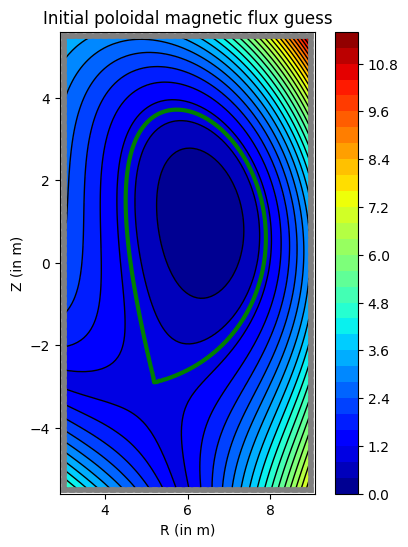

In [ ]:
# DEFINE INITIAL GUESS FOR PLASMA MAGNETIC FLUX
"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                                  

"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                             
                                 
"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'ZHENG',  # PREDEFINED MODEL
                                  NOISE = True,         # WHITE NOISE 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33,         # TRIANGULARITY
                                  A = 2.0)              # NOISE AMPLITUDE
"""

"""
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'NONLINEAR',  # PREDEFINED MODEL
                                  NOISE = True,             # WHITE NOISE 
                                  R0 = 6.0,                 # MEAN RADIUS
                                  A = 2.0)                  # NOISE AMPLITUDE         
"""   

X_SADDLE = np.array([5.2, -2.9])        # ACTIVE SADDLE POINT
X_RIGHT = np.array([7.9, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.5, 1.5])           # POINT ON LEFT
X_TOP = np.array([5.9, 3.7])            # POINT ON TOP

X0 = list()
X0.append(np.array([6.0,0.0],dtype=float))
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'F4E',
                                  NORMALISE = True,
                                  Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                  Xright = X_RIGHT,    # POINT ON RIGHT
                                  Xleft = X_LEFT,      # POINT ON LEFT
                                  Xtop = X_TOP,        # POINT ON TOP
                                  X0 = X0)     

"""
def PSI0(X):
    return
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'OTHER',
                                  PSI0 = PSI0)
"""

Equilibrium.initialPSI.Plot()

In [8]:
Equilibrium.InitialisePSI()

INITIALISE PSI...
     -> INITIALISE PSI ARRAYS...Done!
     -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!
Done!


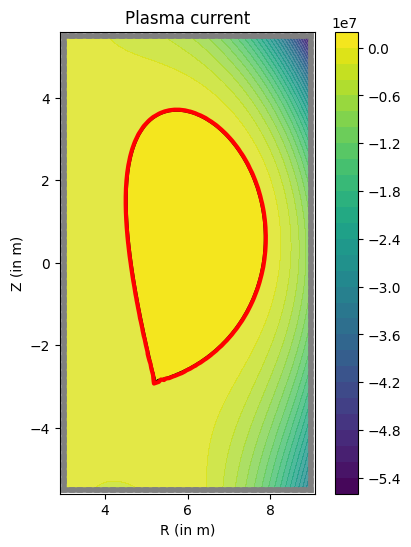

In [9]:
### DEFINE PLASMA CURRENT MODEL

# COMPUTE PRESSURE PROFILE FACTOR
R0 = 6.0        # MEAN RADIUS
kappa = 1.7     # ELONGATION
B0 = 9.0        # MAGNETIC FIELD MAGNITUDE ON MAGNETIC AXIS
q0 = 0.7        # TOKAMAK SAFETY FACTOR

P0=B0*((kappa**2)+1)/(Equilibrium.mu0*(R0**2)*q0*kappa)

"""
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'JARDIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     np = 2.0,          # 
                                     G0 = -34.4,        # TOROIDAL FUNCTION VALUE ON MAGNETIC AXIS
                                     ng = 2.0,          #
                                     Tcurrent = -15e6)  # TOTAL PLASMA CURRENT
"""

"""
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'PCONSTRAIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     alpha_m = 1,       # 
                                     alpha_n = 2,       #
                                     Tcurrent = 15e6)  # TOTAL PLASMA CURRENT
"""

Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'APEC',
                                     Ii = 0.81,         # PLASMA INTERNAL INDUCTANCE
                                     Betap = 0.75,      # POLOIDAL BETA
                                     R0 = 6.0,          # MEAN RADIUS
                                     Tcurrent = 15e6)   # TOTAL PLASMA CURRENT


"""
# USER DEFINED MODEL
def Jphi(X,PSI):
    return 6*X[0]
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'OTHER',
                                     Jphi = Jphi,
                                     PSIdependent = False)
"""

Equilibrium.IntegratePlasmaDomain(Equilibrium.PlasmaCurrent.Jphi)

Equilibrium.PlasmaCurrent.Plot()

PREPARE OUTPUT DIRECTORY...Done!
INITIALISE PSI_B...
     -> COMPUTE INITIAL VACUUM VESSEL BOUNDARY VALUES PSI_B...Done!
     -> ASSIGN INITIAL BOUNDARY VALUES...Done!
Done!
WRITE INITIAL SIMULATION DATA...Done!


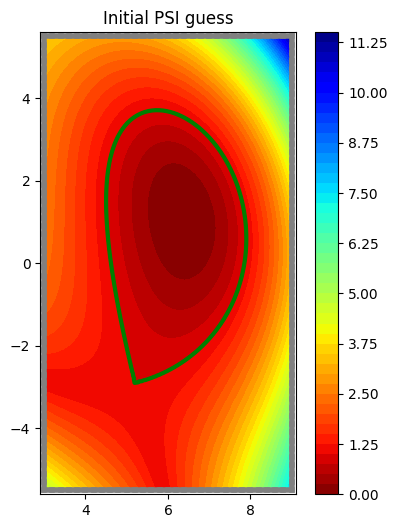

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Total current =  14999999.999999953
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.45107558, 0.81077427]), -11.24105070122416, 876)]
Xpoint =  [(array([ 5.0860119 , -3.31691651]), -0.3446614683921522, 2368)]
LOCAL EXTREMUM AT  [6.45107558 0.81077427]  (ELEMENT  876 ) WITH VALUE PSI_0 =  -11.24105070122416
SADDLE POINT AT  [ 5.0860119  -3.31691651]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.3446614683921522


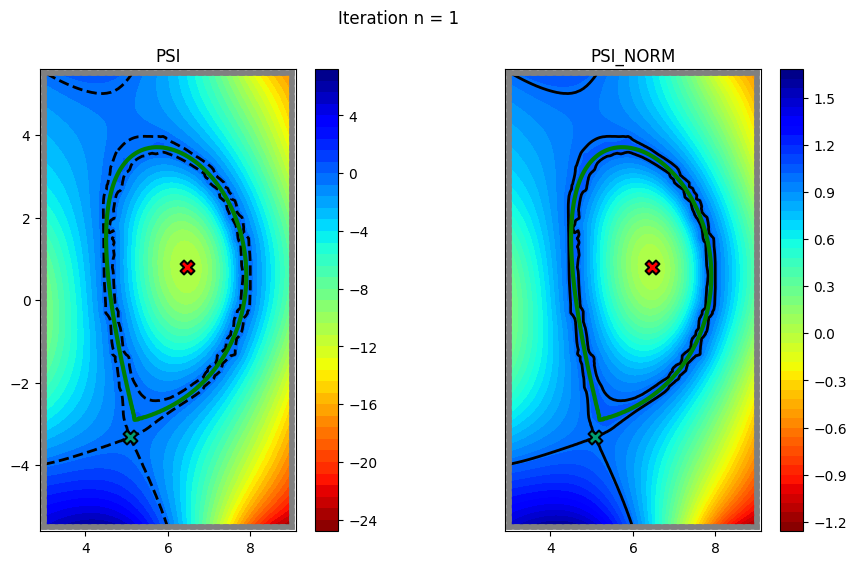

Internal iteration =  1 , PSI_NORM residu =  2.949824076987988
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Total current =  14999999.99999995
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.47780171, 0.80986189]), -12.840641208165838, 876)]
Xpoint =  [(array([ 5.06088688, -3.37430846]), -0.02655418990524051, 2356)]
LOCAL EXTREMUM AT  [6.47780171 0.80986189]  (ELEMENT  876 ) WITH VALUE PSI_0 =  -12.840641208165838
SADDLE POINT AT  [ 5.06088688 -3.37430846]  (ELEMENT  2356 ) WITH VALUE PSI_X =  -0.02655418990524051


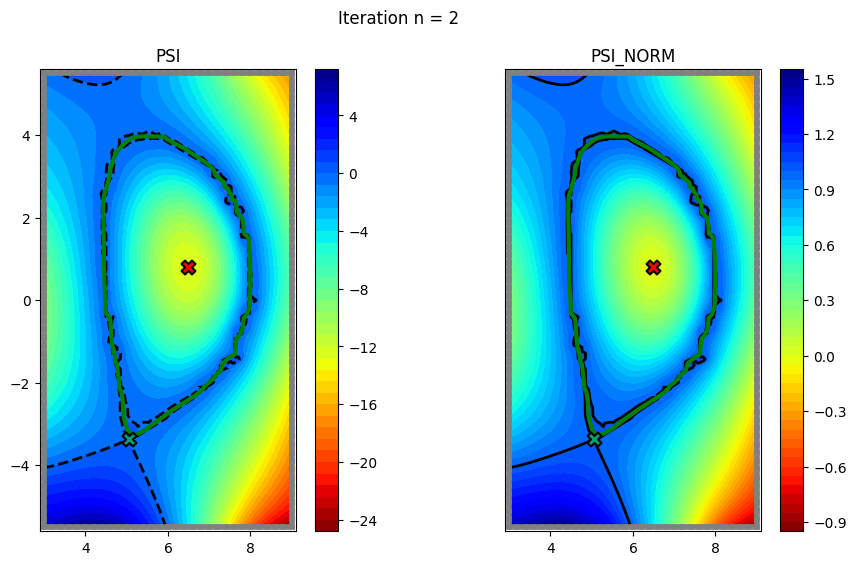

Internal iteration =  2 , PSI_NORM residu =  0.11114265955984734
 
Plasma region unchanged: distance between consecutive saddle points =  0.06265063340670521
 
OUTER ITERATION = 1 , INNER ITERATION = 3
     Total current =  14999999.999999942
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.4915326 , 0.72685712]), -14.432978757511636, 885)]
Xpoint =  [(array([ 5.06128802, -3.37455231]), -0.026707141057945385, 2356)]
LOCAL EXTREMUM AT  [6.4915326  0.72685712]  (ELEMENT  885 ) WITH VALUE PSI_0 =  -14.432978757511636
SADDLE POINT AT  [ 5.06128802 -3.37455231]  (ELEMENT  2356 ) WITH VALUE PSI_X =  -0.026707141057945385


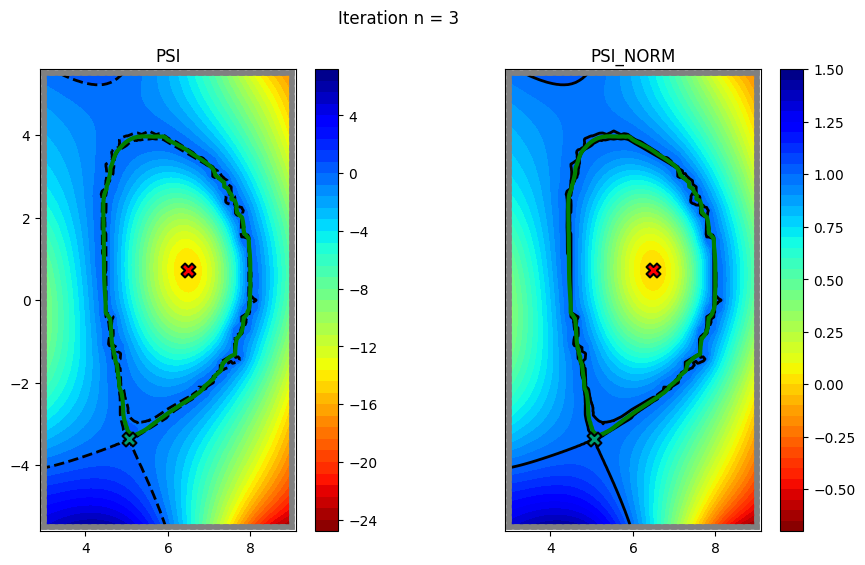

Internal iteration =  3 , PSI_NORM residu =  0.06700787340145942
 
Plasma region unchanged: distance between consecutive saddle points =  0.06271487829127793
 
OUTER ITERATION = 1 , INNER ITERATION = 4
     Total current =  14999999.999999972
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.50766382, 0.72248916]), -12.892328854387248, 885)]
Xpoint =  [(array([ 5.06082779, -3.37430811]), -0.026541641329855706, 2356)]
LOCAL EXTREMUM AT  [6.50766382 0.72248916]  (ELEMENT  885 ) WITH VALUE PSI_0 =  -12.892328854387248
SADDLE POINT AT  [ 5.06082779 -3.37430811]  (ELEMENT  2356 ) WITH VALUE PSI_X =  -0.026541641329855706


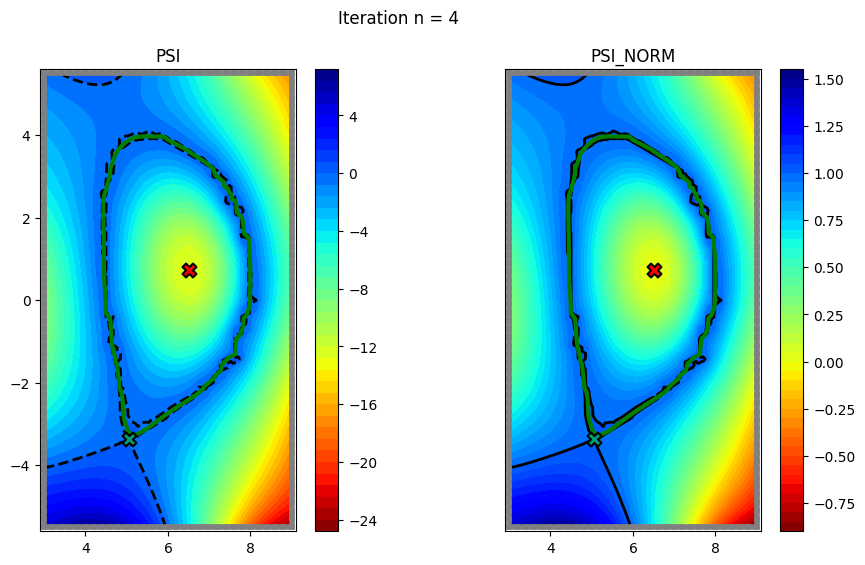

Internal iteration =  4 , PSI_NORM residu =  0.06323415969516623
 
Plasma region unchanged: distance between consecutive saddle points =  0.06267404074674963
 
OUTER ITERATION = 1 , INNER ITERATION = 5
     Total current =  15000000.000000047
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51273342, 0.68773804]), -13.265807151478036, 885)]
Xpoint =  [(array([ 5.06086374, -3.37432679]), -0.02655641229170585, 2356)]
LOCAL EXTREMUM AT  [6.51273342 0.68773804]  (ELEMENT  885 ) WITH VALUE PSI_0 =  -13.265807151478036
SADDLE POINT AT  [ 5.06086374 -3.37432679]  (ELEMENT  2356 ) WITH VALUE PSI_X =  -0.02655641229170585


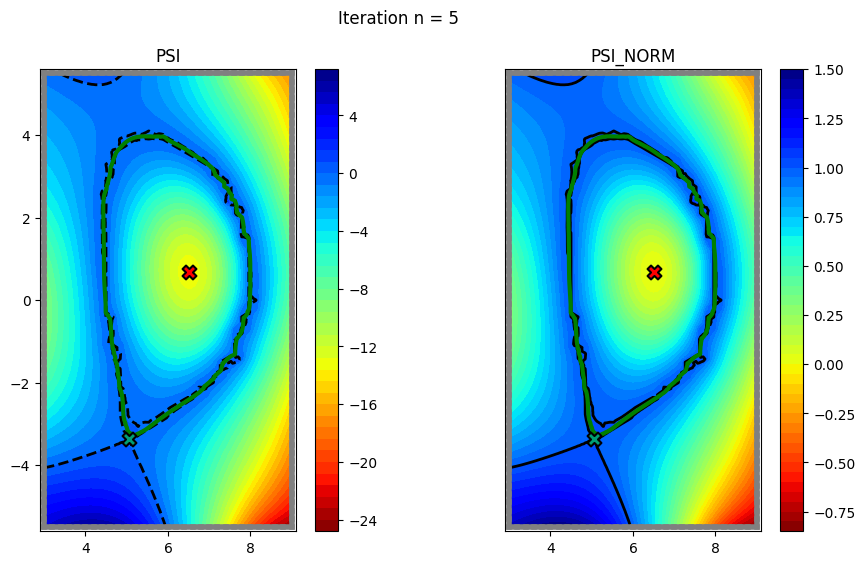

Internal iteration =  5 , PSI_NORM residu =  0.01782994922827386
 
Plasma region unchanged: distance between consecutive saddle points =  0.06267671008983075
 
OUTER ITERATION = 1 , INNER ITERATION = 6
     Total current =  15000000.000000037
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51767277, 0.68514955]), -13.043474613059045, 885)]
Xpoint =  [(array([ 5.06080781, -3.37428817]), -0.026529632624524582, 2368)]
LOCAL EXTREMUM AT  [6.51767277 0.68514955]  (ELEMENT  885 ) WITH VALUE PSI_0 =  -13.043474613059045
SADDLE POINT AT  [ 5.06080781 -3.37428817]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.026529632624524582


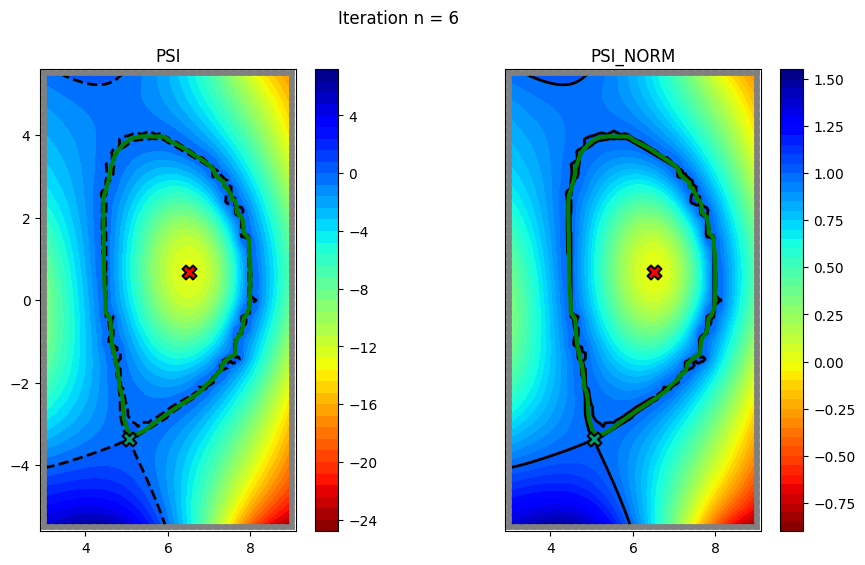

Internal iteration =  6 , PSI_NORM residu =  0.009990909709726476
 
Plasma region unchanged: distance between consecutive saddle points =  0.06266380894274126
 
OUTER ITERATION = 1 , INNER ITERATION = 7
     Total current =  15000000.000000093
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.51989533, 0.66885092]), -13.147462413366046, 885)]
Xpoint =  [(array([ 5.06080442, -3.37428276]), -0.02652690149834955, 2368)]
LOCAL EXTREMUM AT  [6.51989533 0.66885092]  (ELEMENT  885 ) WITH VALUE PSI_0 =  -13.147462413366046
SADDLE POINT AT  [ 5.06080442 -3.37428276]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.02652690149834955


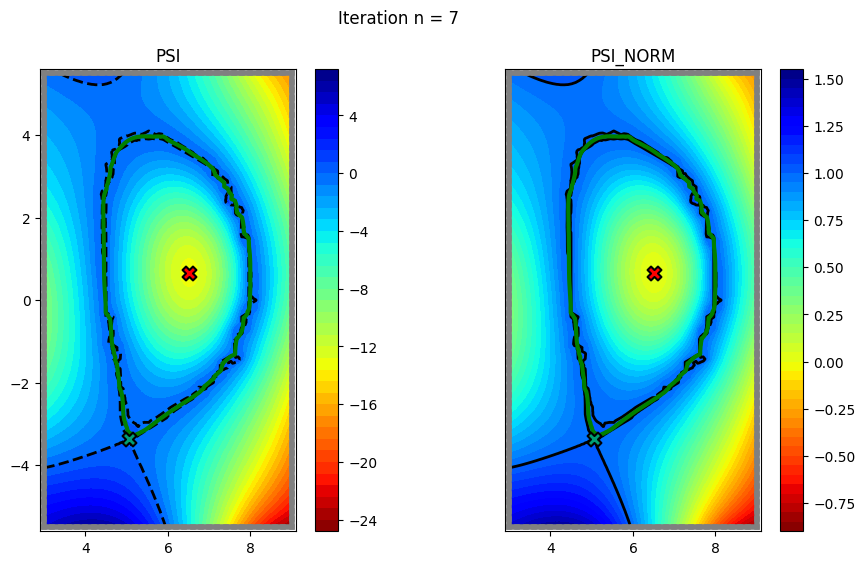

Internal iteration =  7 , PSI_NORM residu =  0.005330737059441467
 
Plasma region unchanged: distance between consecutive saddle points =  0.06266022775511183
 
OUTER ITERATION = 1 , INNER ITERATION = 8
     Total current =  15000000.000000078
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52106652, 0.66760436]), -13.096364100884122, 883)]
Xpoint =  [(array([ 5.06079022, -3.37427182]), -0.026519921340777314, 2368)]
LOCAL EXTREMUM AT  [6.52106652 0.66760436]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.096364100884122
SADDLE POINT AT  [ 5.06079022 -3.37427182]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.026519921340777314


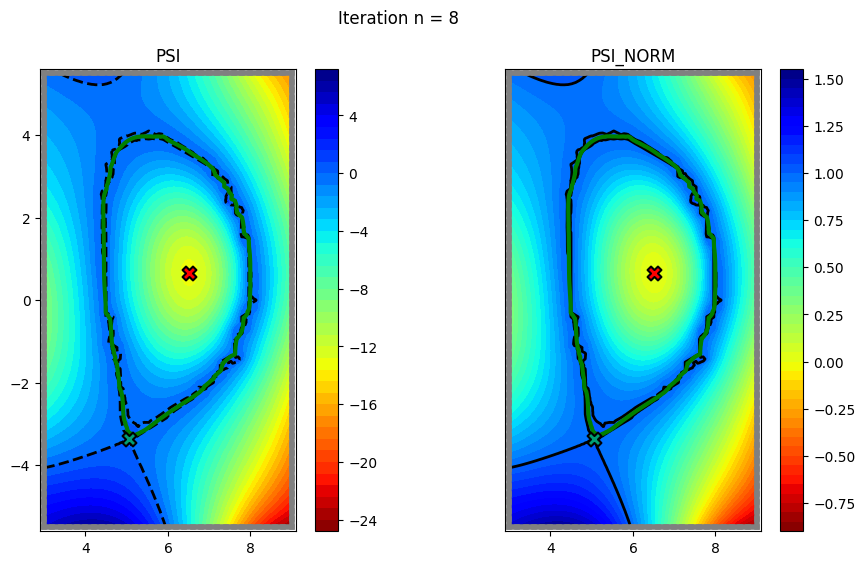

Internal iteration =  8 , PSI_NORM residu =  0.002341814900126498
 
Plasma region unchanged: distance between consecutive saddle points =  0.06265592482301477
 
OUTER ITERATION = 1 , INNER ITERATION = 9
     Total current =  15000000.000000052
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52202097, 0.6597223 ]), -13.128258585439706, 883)]
Xpoint =  [(array([ 5.06078358, -3.37426529]), -0.026516107928920576, 2368)]
LOCAL EXTREMUM AT  [6.52202097 0.6597223 ]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.128258585439706
SADDLE POINT AT  [ 5.06078358 -3.37426529]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.026516107928920576


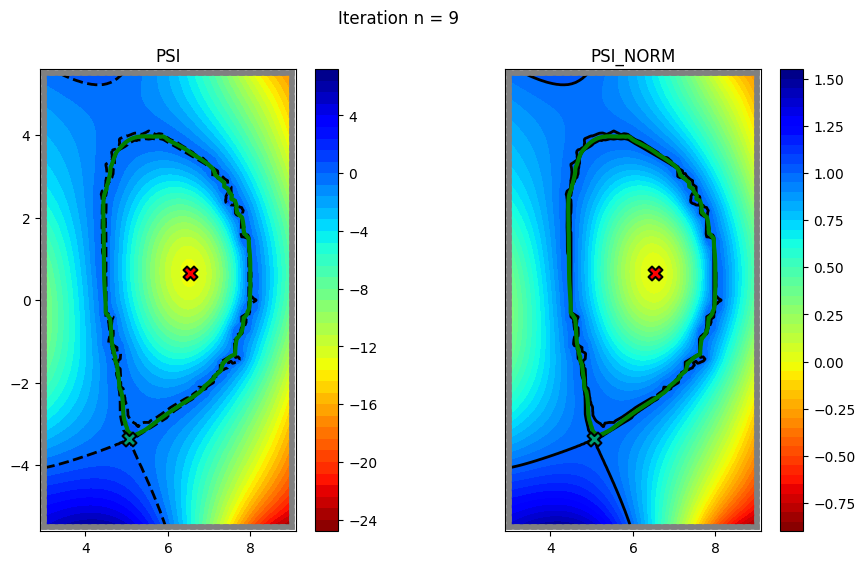

Internal iteration =  9 , PSI_NORM residu =  0.0018376770952996965
 
Plasma region unchanged: distance between consecutive saddle points =  0.06265261669870467
 
OUTER ITERATION = 1 , INNER ITERATION = 10
     Total current =  15000000.000000127
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52225785, 0.65913229]), -13.114391505586203, 883)]
Xpoint =  [(array([ 5.060779  , -3.37426159]), -0.026513771838678233, 2368)]
LOCAL EXTREMUM AT  [6.52225785 0.65913229]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.114391505586203
SADDLE POINT AT  [ 5.060779   -3.37426159]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.026513771838678233


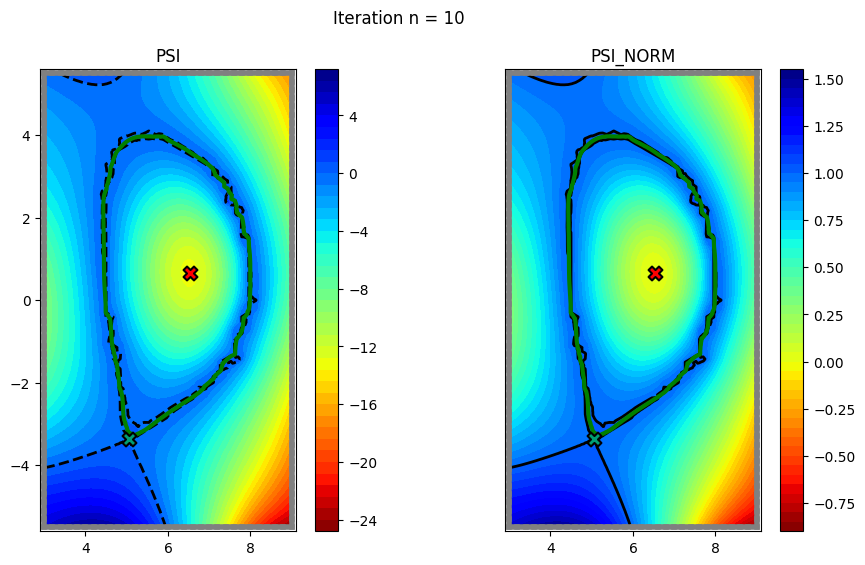

Internal iteration =  10 , PSI_NORM residu =  0.0006441930618012679
 
Plasma region unchanged: distance between consecutive saddle points =  0.06265107546796948
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
External iteration =  1 , PSI_B residu =  0.04250309724746305
 
OUTER ITERATION = 2 , INNER ITERATION = 1
     Total current =  15000000.00000003
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52268916, 0.65526123]), -13.124901400611268, 883)]
Xpoint =  [(array([ 5.10333282, -3.30220277]), -0.00181795454589277, 2368)]
LOCAL EXTREMUM AT  [6.52268916 0.65526123]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.124901400611268
SADDLE POINT AT  [ 5.10333282 -3.30220277]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.00181795454589277


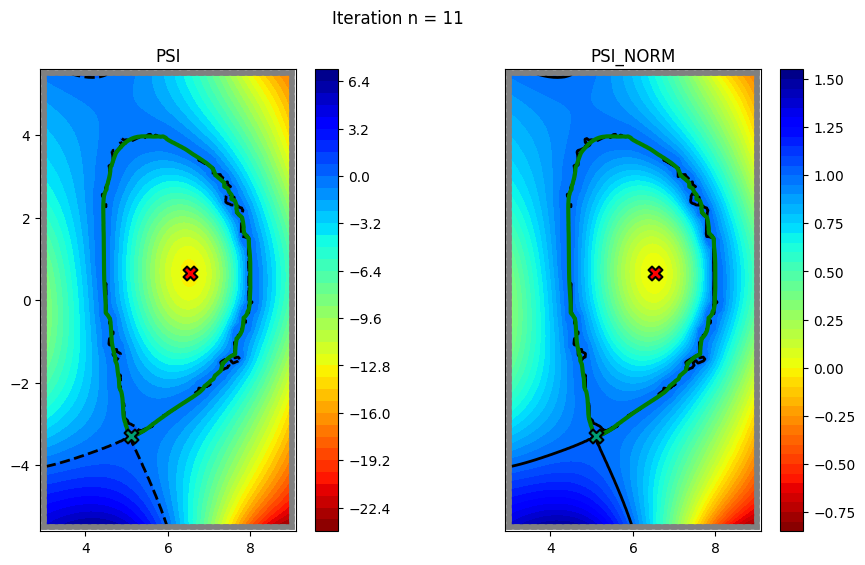

Internal iteration =  1 , PSI_NORM residu =  0.02328864697218714
 
Plasma region unchanged: distance between consecutive saddle points =  0.02272682152236096
 
OUTER ITERATION = 2 , INNER ITERATION = 2
     Total current =  15000000.000000045
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52272731, 0.65497766]), -13.120796798805404, 883)]
Xpoint =  [(array([ 5.10332756, -3.30220377]), -0.0018167650471554195, 2368)]
LOCAL EXTREMUM AT  [6.52272731 0.65497766]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.120796798805404
SADDLE POINT AT  [ 5.10332756 -3.30220377]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.0018167650471554195


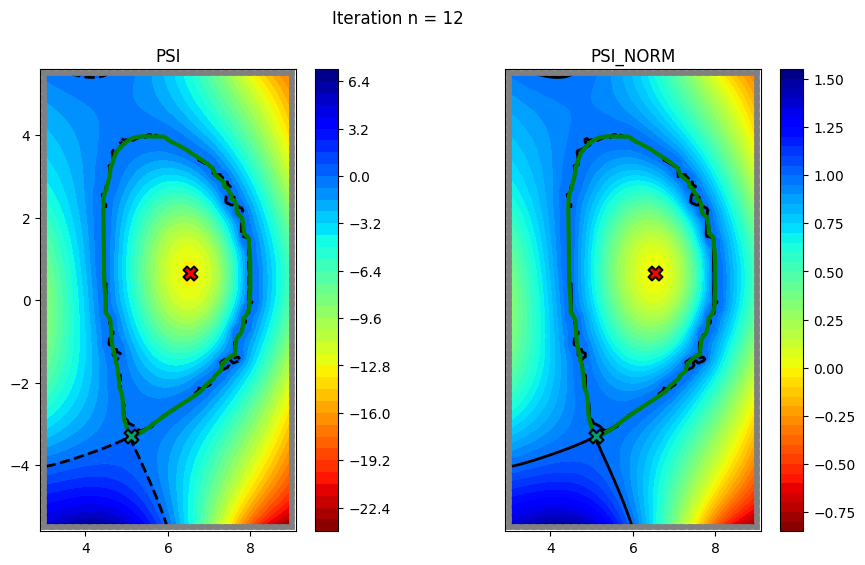

Internal iteration =  2 , PSI_NORM residu =  0.0001897046898759125
 
Plasma region unchanged: distance between consecutive saddle points =  0.02272216130992827
 
OUTER ITERATION = 2 , INNER ITERATION = 3
     Total current =  14999999.999999922
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52286894, 0.65306084]), -13.093711993653027, 883)]
Xpoint =  [(array([ 5.10323406, -3.30223288]), -0.0018018215477826939, 2368)]
LOCAL EXTREMUM AT  [6.52286894 0.65306084]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.093711993653027
SADDLE POINT AT  [ 5.10323406 -3.30223288]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.0018018215477826939


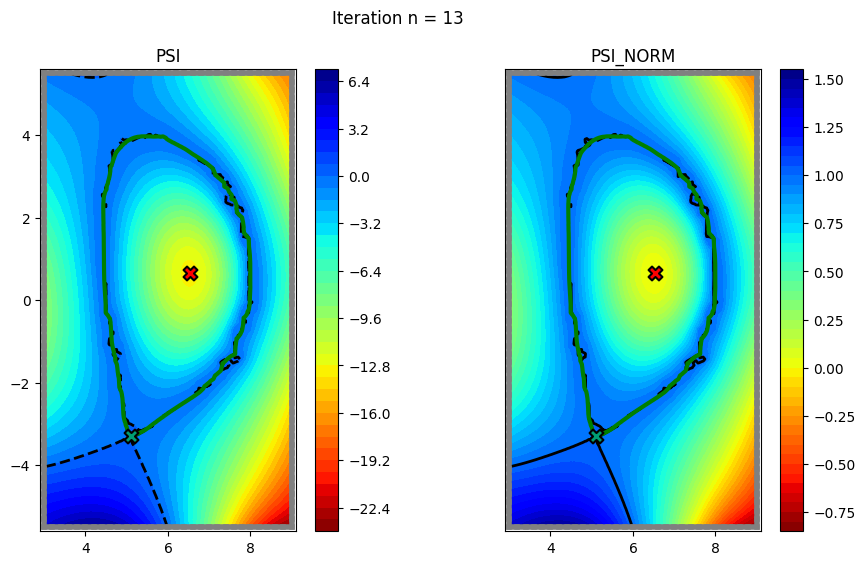

Internal iteration =  3 , PSI_NORM residu =  0.0011926360838805058
 
Plasma region unchanged: distance between consecutive saddle points =  0.02263209482804285
 
OUTER ITERATION = 2 , INNER ITERATION = 4
     Total current =  15000000.000000212
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.52287148, 0.65292331]), -13.092438070249687, 883)]
Xpoint =  [(array([ 5.10323206, -3.30223325]), -0.0018013630278876007, 2368)]
LOCAL EXTREMUM AT  [6.52287148 0.65292331]  (ELEMENT  883 ) WITH VALUE PSI_0 =  -13.092438070249687
SADDLE POINT AT  [ 5.10323206 -3.30223325]  (ELEMENT  2368 ) WITH VALUE PSI_X =  -0.0018013630278876007


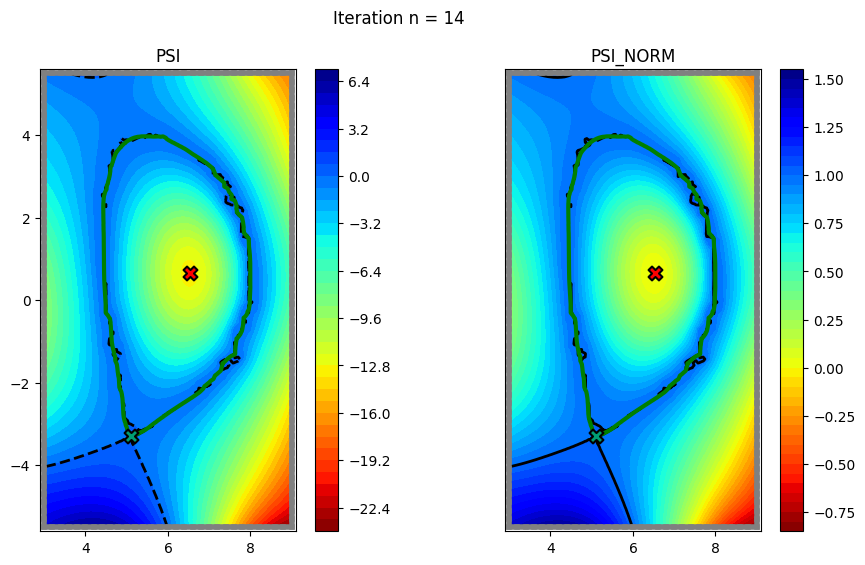

Internal iteration =  4 , PSI_NORM residu =  6.0982510129921297e-05
 
Plasma region unchanged: distance between consecutive saddle points =  0.02263033397271331
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
External iteration =  2 , PSI_B residu =  0.0007926553543264785
 
SOLUTION CONVERGED


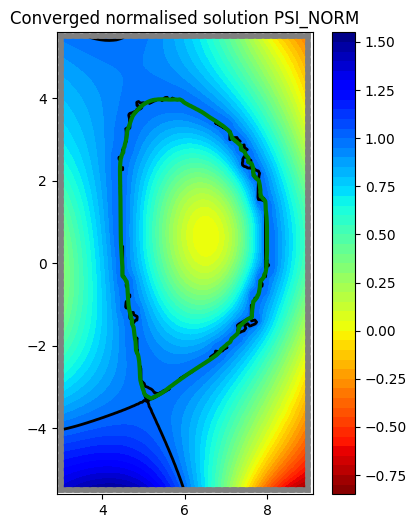

In [10]:
## NAME SIMULATION CASE 
CASE = "TS-FREE-APEC-REC"

## COMPUTE PLASMA EQUILIBRIUM
Equilibrium.EQUILI(CASE)